In [3]:
import os
# print(os.chdir('c://Users//Admin//Desktop//ML Projects//House Price Prediction System'))
import pandas as pd
import numpy as np

from ingest_data import DataIngestorFactory
from basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsDataInspectionStrategy
from missing_values_analysis import SimpleMissingValuesAnalysis
from univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from bivariate_analysis import BivariateAnalyzer, NumericalBivariateAnalysis, CategoricalVsNumericalBivariateAnalysis
from multivariate_analysis import SimpleMultivariateAnalysis

# set display options for better readability.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
# Load the data
data_path = r'C:\Users\Admin\Desktop\ML Projects\House Price Prediction System\data\archive.zip'
data_ingestor = DataIngestorFactory().get_data_ingestor('.zip')
df = data_ingestor.ingest(data_path)
df.head()
df.shape

(2930, 82)

In [8]:
# Basic Data Inspection
inspector = DataInspector(DataTypesInspectionStrategy())
inspector.execute_inspection(df)


Data Types and Non-Null Counts.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

In [9]:
inspector.set_strategy(SummaryStatisticsDataInspectionStrategy())
inspector.execute_inspection(df)


Summary Statistics(Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      


Missing values count by column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing Values...


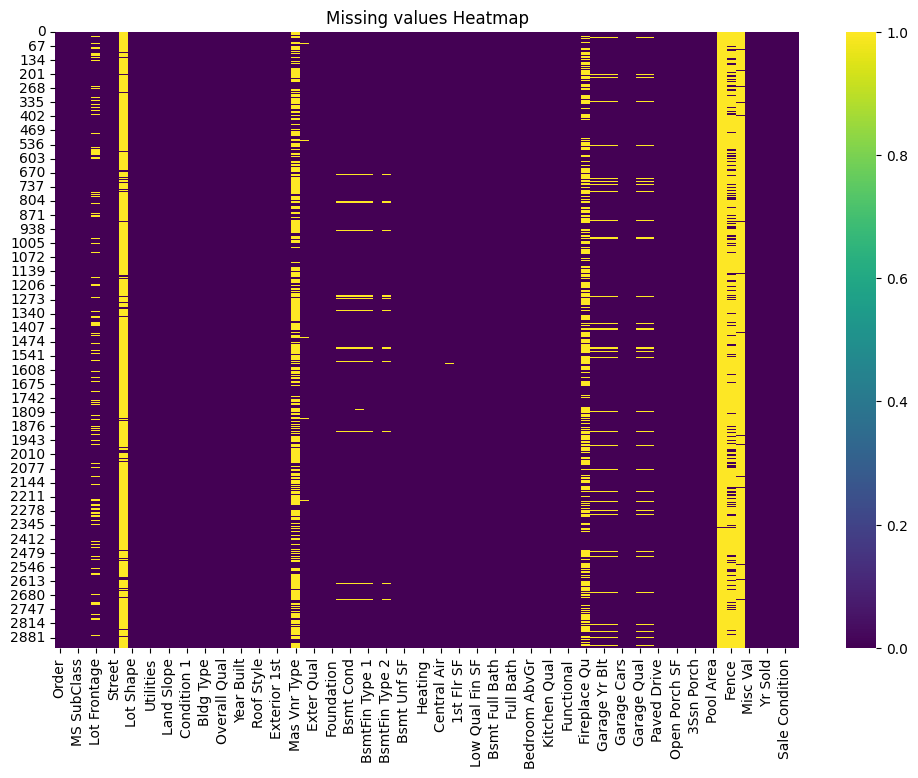

In [5]:
analysis = SimpleMissingValuesAnalysis()
analysis.analyze(df)

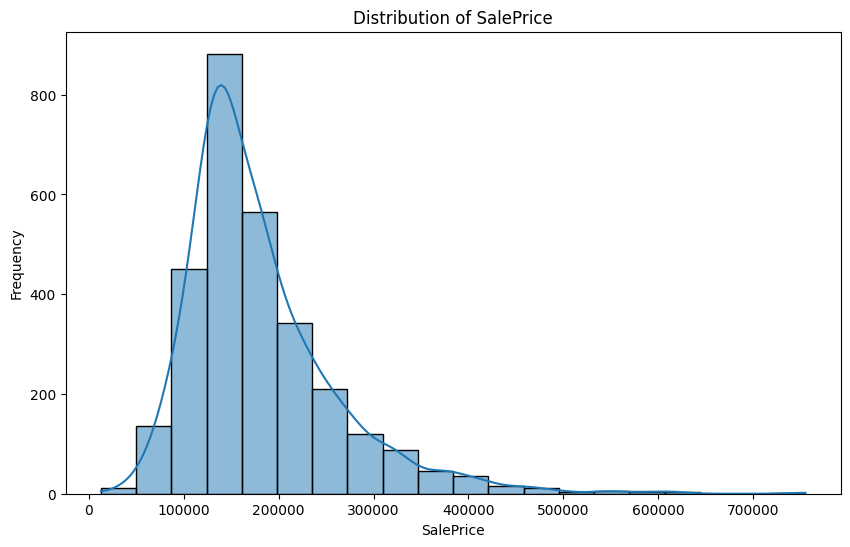

In [11]:
univariate_analysis = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analysis.execute_analyzer(df, 'SalePrice')

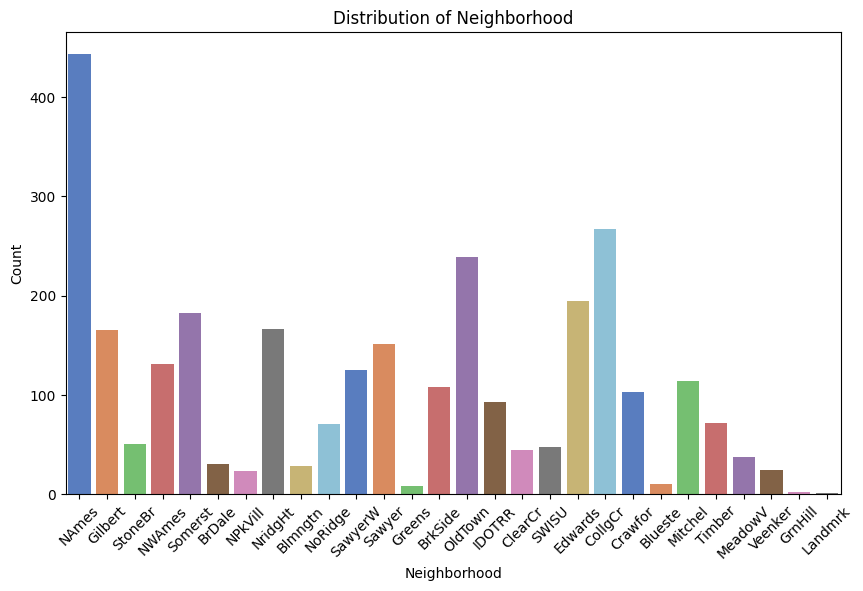

In [12]:
univariate_analysis.set_analyzer(CategoricalUnivariateAnalysis())
univariate_analysis.execute_analyzer(df, 'Neighborhood')

## Bivariate Analysis

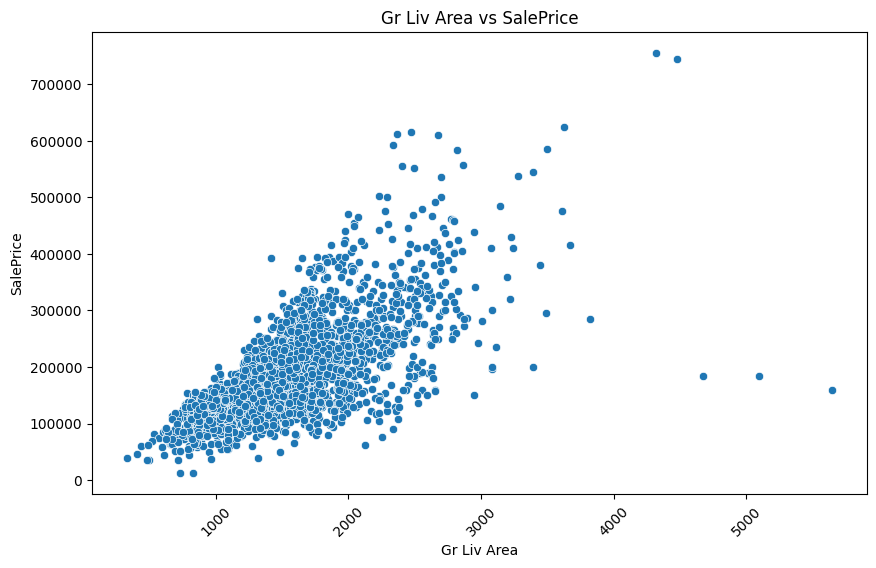

In [13]:
bivariate_analyzer = BivariateAnalyzer(NumericalBivariateAnalysis())
bivariate_analyzer.execute_analyzer(df, 'Gr Liv Area', 'SalePrice')

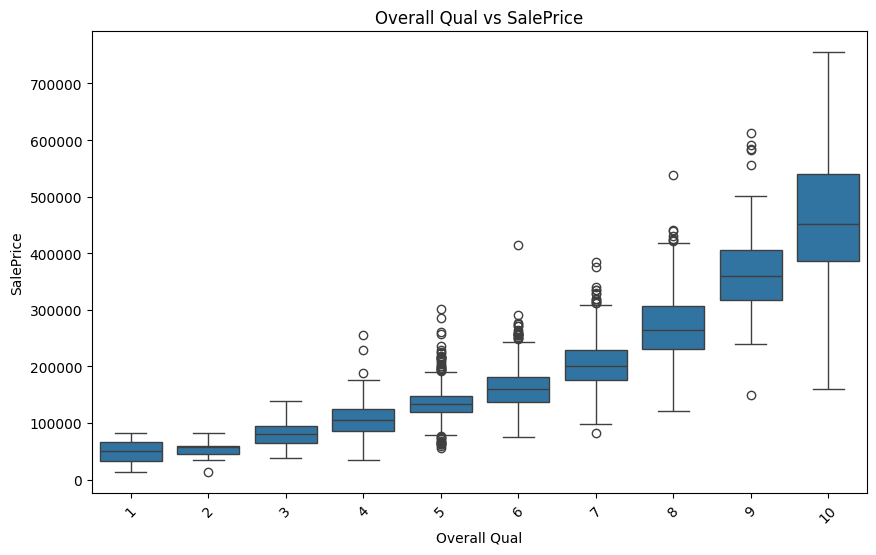

In [14]:
bivariate_analyzer.set_method(CategoricalVsNumericalBivariateAnalysis())
bivariate_analyzer.execute_analyzer(df, 'Overall Qual', 'SalePrice')

## Multivariate Analysis

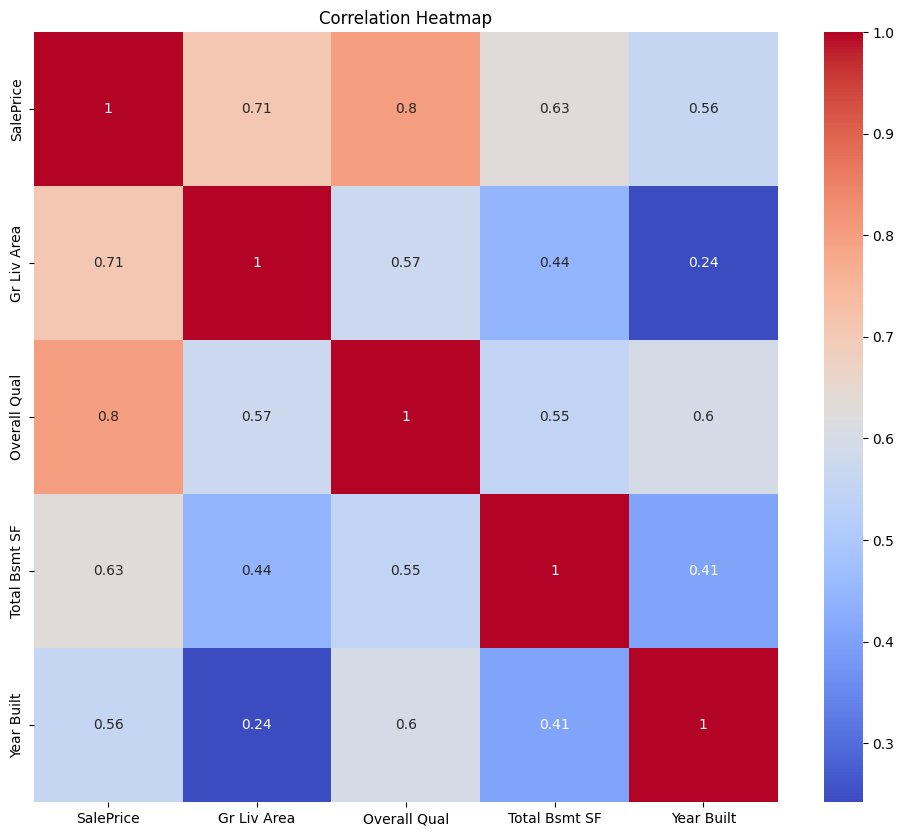

<Figure size 1200x1000 with 0 Axes>

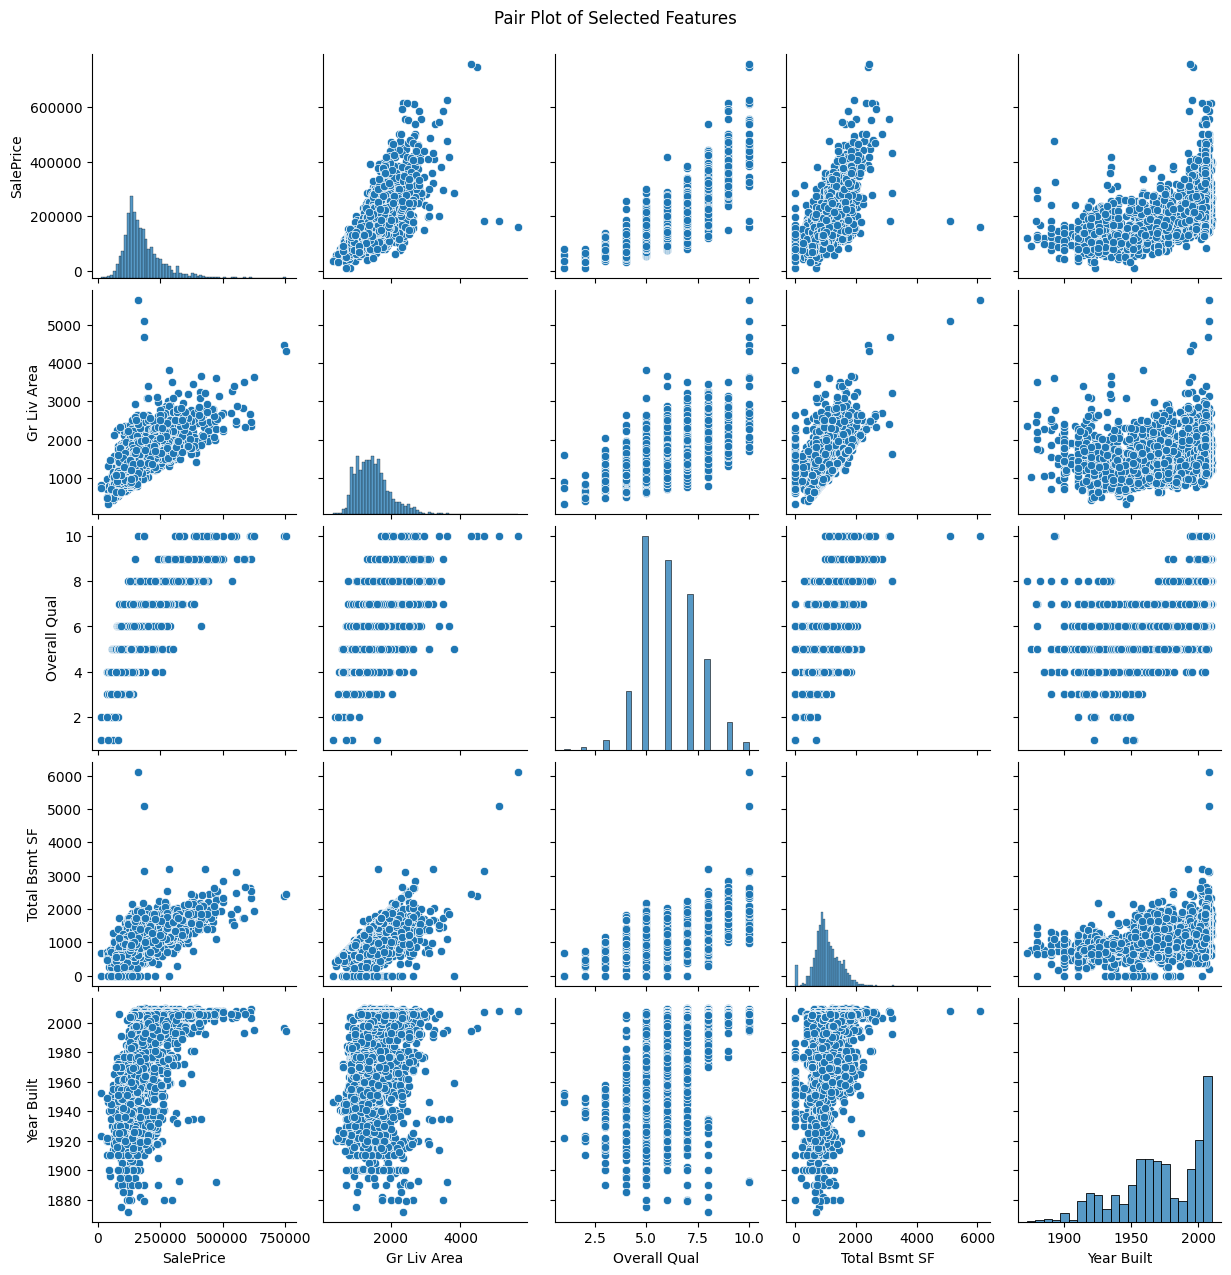

In [15]:
multivariate_analysis = SimpleMultivariateAnalysis()
selected_features = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]
multivariate_analysis.analyze(selected_features)

# Insights

### **1. Data Types and Non-Null Counts**

- The dataset contains 2930 entries and 81 columns.
- **Data Types**: There are 11 columns with float64 data type, 28 columns with int64 data type, and 43 columns with object data type.
    - **Numerical Features**: These include features like Lot Frontage, Lot Area, Overall Qual, Year Built, etc.
    - **Categorical Features**: Features like MS Zoning, street, Neighborhood, Alley etc., are categorical.

### **2. Summary Statistics**

- **Numerical Features:**
    - The target variable sale price has a mean of $180,796.060068 with a standard deviation of $79,886, indicating significant spread in house prices.
    - Overall Qual ranges from 1 to 10, with a mean of 6.09 showing a relatively high quality on average.
    - Year Built ranges from 1872 to 2010, indicating that the dataset includes both very old and relatively new houses.
    - Lot Area has wide range with some extreme outliers, which might indicate large properties.